In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

dataset overview:
This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [4]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
print(df.shape)
print(df.dtypes)
print(df.head(4))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   

   start_station_id                                start_

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

i will start cleaning now

In [11]:
#making a copy of the table
wrangled_df = df.copy()

In [12]:
#I will change the data types to the accurate ones
wrangled_df['start_time'] = pd.to_datetime(wrangled_df['start_time'])
wrangled_df['end_time'] = pd.to_datetime(wrangled_df['end_time'])
wrangled_df['start_station_id'] = wrangled_df['start_station_id'].astype('str')
wrangled_df['end_station_id'] = wrangled_df['end_station_id'].astype('str')
wrangled_df['user_type'] = wrangled_df['user_type'].astype('category')
wrangled_df['member_gender'] = wrangled_df['member_gender'].astype('category')
wrangled_df['bike_id'] = wrangled_df['bike_id'].astype('str')

wrangled_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [13]:
# adding new columns that will make the analysis process easier
#column for trip duration in mins
wrangled_df['trip_duration'] = wrangled_df['duration_sec']/60

In [14]:
#I will reformat the start_time column into new columns each specified for month of year, day of week and hour of day
wrangled_df['start_date'] = wrangled_df.start_time.dt.strftime('%Y-%m-%d')
wrangled_df['start_hourofday'] = wrangled_df.start_time.dt.strftime('%H')
wrangled_df['start_dayofweek'] = wrangled_df.start_time.dt.strftime('%A')
wrangled_df['start_month'] = wrangled_df.start_time.dt.strftime('%B')

wrangled_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


In [15]:
wrangled_df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1927.0        1
1910.0        1
1930.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [16]:
#making a new column for the rider age
wrangled_df['member_age'] = 2019 - wrangled_df['member_birth_year']
wrangled_df['member_age'].value_counts()

31.0     10236
26.0      9325
30.0      8972
29.0      8658
28.0      8498
         ...  
91.0         1
89.0         1
109.0        1
141.0        1
92.0         1
Name: member_age, Length: 75, dtype: int64

In [17]:
#removing any age > 75 considering them as outliers
wrangled_df = wrangled_df.query('member_age < 75')

wrangled_df['member_age'].value_counts()

31.0    10236
26.0     9325
30.0     8972
29.0     8658
28.0     8498
27.0     8250
32.0     8018
33.0     7973
25.0     7660
24.0     7423
34.0     7028
35.0     6562
36.0     5954
39.0     5024
37.0     4990
23.0     4640
38.0     4345
40.0     3756
22.0     3481
21.0     3208
41.0     2830
42.0     2725
45.0     2633
20.0     2528
44.0     2503
43.0     2442
46.0     2080
51.0     1928
48.0     1924
47.0     1909
19.0     1678
49.0     1590
54.0     1546
50.0     1414
52.0     1315
55.0     1189
56.0     1151
53.0      989
57.0      956
58.0      821
59.0      807
62.0      807
60.0      624
61.0      517
63.0      392
65.0      301
67.0      189
68.0      180
69.0      178
66.0      158
72.0      135
64.0      134
74.0      105
70.0       99
71.0       51
18.0       34
73.0       19
Name: member_age, dtype: int64

In [18]:
wrangled_df['member_age'].mean()

34.104053018606834

In [19]:
#assuring all data types are the way i want
wrangled_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
trip_duration                     float64
start_date                         object
start_hourofday                    object
start_dayofweek                    object
start_month                        object
member_age                        float64
dtype: object

In [20]:
#removing unnecessary columns 
wrangled_df = wrangled_df.drop(columns = (['start_station_latitude', 'start_station_longitude', 'end_station_latitude', \
                                          'end_station_longitude', 'member_birth_year', 'duration_sec']))
wrangled_df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,trip_duration,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,869.750000,2019-02-28,17,Thursday,February,35.0
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030.900000,2019-02-28,12,Thursday,February,47.0
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,608.166667,2019-02-28,17,Thursday,February,30.0
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45.0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,29.883333,2019-02-28,23,Thursday,February,60.0


In [21]:
cols = list(wrangled_df.columns.values)
cols

['start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'trip_duration',
 'start_date',
 'start_hourofday',
 'start_dayofweek',
 'start_month',
 'member_age']

In [22]:
#Changing Age data type to int
wrangled_df['member_age'] = wrangled_df['member_age'].astype(int)
wrangled_df.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_gender                    category
bike_share_for_all_trip            object
trip_duration                     float64
start_date                         object
start_hourofday                    object
start_dayofweek                    object
start_month                        object
member_age                          int32
dtype: object

In [23]:
#saving the wrangled_df into .csv file
wrangled_df.to_csv('wrangled_dataset.csv')

In [24]:
wrangled_df.isnull().sum()

start_time                   0
end_time                     0
start_station_id             0
start_station_name         195
end_station_id               0
end_station_name           195
bike_id                      0
user_type                    0
member_gender                0
bike_share_for_all_trip      0
trip_duration                0
start_date                   0
start_hourofday              0
start_dayofweek              0
start_month                  0
member_age                   0
dtype: int64

What is the structure of your dataset?
There are 183412 rows in the dataset and 17 columns, here are what the columns: 
+Trip Duration :  the tome of trip taken in minutes 
+start time and end time : the time of start and end of the trip 
+start and end station id, bike id : a numebr specific to each unique station and bike 
+dist :the distance of the trip in kilometers 

What is/are the main feature(s) of interest in your dataset?
Main features of interest are:

Most popular hours and days for using the bikes in genarl 

Age of most of the members and their gender

whether the bikes are used most by subscribers or customers 

What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Features that will support my investigation are:

1-Start Time

2-Age

3-Gender

4-Distance

Univariate Exploration

explanatory analysis

Daily Bike Trips Count

<Figure size 841.68x595.44 with 0 Axes>

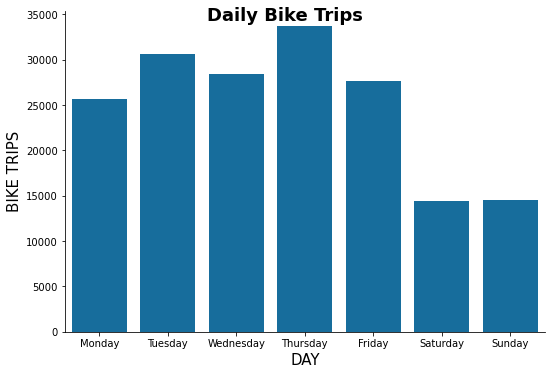

In [25]:
#most popular day of the week for bike trips
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_day = sb.catplot(data = wrangled_df, x='start_dayofweek',order = days_order,\
                        kind='count', color = clr, aspect = 1.5)
plt.xlabel("DAY",  fontsize = 15)
plt.ylabel("BIKE TRIPS", fontsize = 15)
trips_day.fig.suptitle('Daily Bike Trips', fontsize=18, fontweight='bold');

Most popular days of the week are working days, while weekends have lower number of trips

Hourly Bike Trips Count

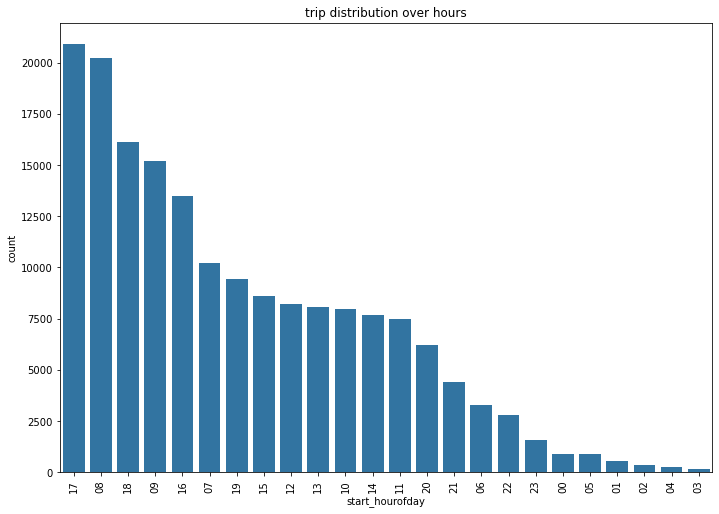

In [26]:
#most popular hour of day for bike trips
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0]
order = wrangled_df["start_hourofday"].value_counts().index
sb.countplot(data = wrangled_df, x="start_hourofday", color = base_color, order = order)
plt.title("trip distribution over hours")
plt.xticks(rotation = 90)
plt.show()

from the plot above we can notice that the hours where peaks occur are while going to work so it's 
Pretty accurate

Trips Count for Members Age

(10.0, 75.0)

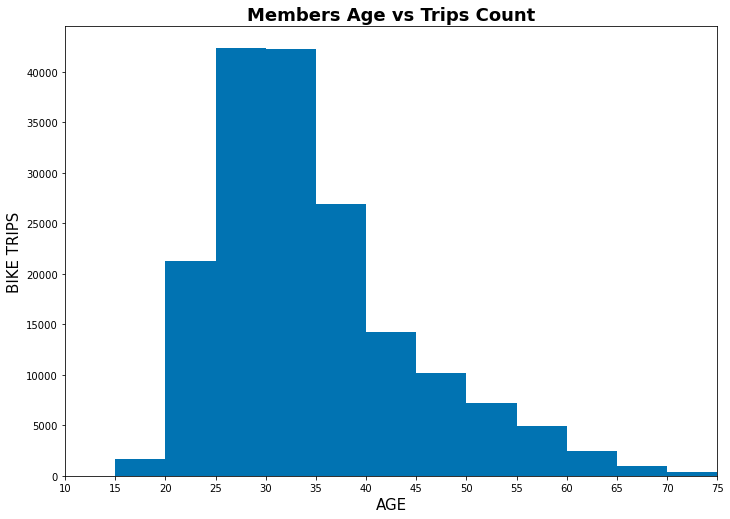

In [27]:
#most popular age of members
plt.figure(figsize=[ 11.69, 8.27]);
bins = np.arange(0, wrangled_df['member_age'].max()+5, 5)
clr = sb.color_palette('colorblind')[0]
plt.hist(data=wrangled_df, x = 'member_age', bins = bins, color = clr)
plt.xticks(bins, bins)
plt.xlabel('AGE', fontsize = 15)
plt.ylabel('BIKE TRIPS', fontsize = 15)
plt.title('Members Age vs Trips Count', fontsize=18, fontweight='bold' )
plt.xlim([10, 75])

the most popular age of our customers and members is from 25 to 40 years old 

In [28]:
#Describing the count of gender as percentage
gender = wrangled_df.groupby('member_gender').agg({'bike_id':'count'})
gender['percentage'] = (gender['bike_id']/gender['bike_id'].sum())*100

Percentage of Members Gender

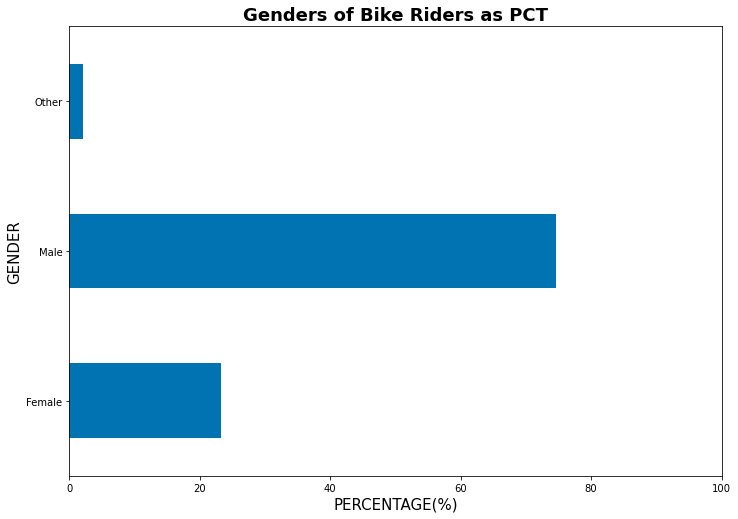

In [29]:
#Percentage of Members Gender
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
gender['percentage'].plot(kind = 'barh', color = clr);
plt.title('Genders of Bike Riders as PCT',  fontsize=18, fontweight='bold')
plt.ylabel('GENDER', fontsize=15)
plt.xlabel('PERCENTAGE(%)', fontsize=15)
plt.xlim([0, 100]);

As we can see, most of the riders are male

Trip duration in minutes

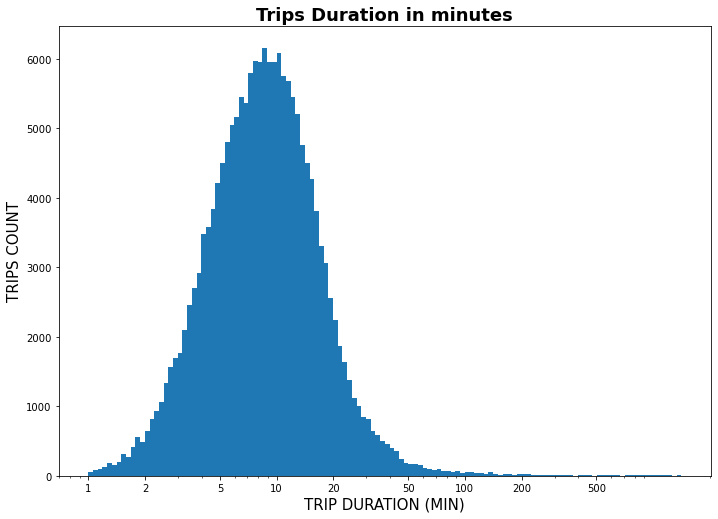

In [30]:
#Trip duration in minutes
plt.figure(figsize=[ 11.69, 8.27]);
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(wrangled_df['trip_duration'].max())+log_binsize, log_binsize)
plt.hist(data = wrangled_df, x = 'trip_duration', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.xlabel('TRIP DURATION (MIN)', fontsize=15);
plt.ylabel('TRIPS COUNT', fontsize=15)
plt.title('Trips Duration in minutes', fontsize=18, fontweight='bold');


Most of the trips are between 2 minutes and 30 minutes long

Users Type Count

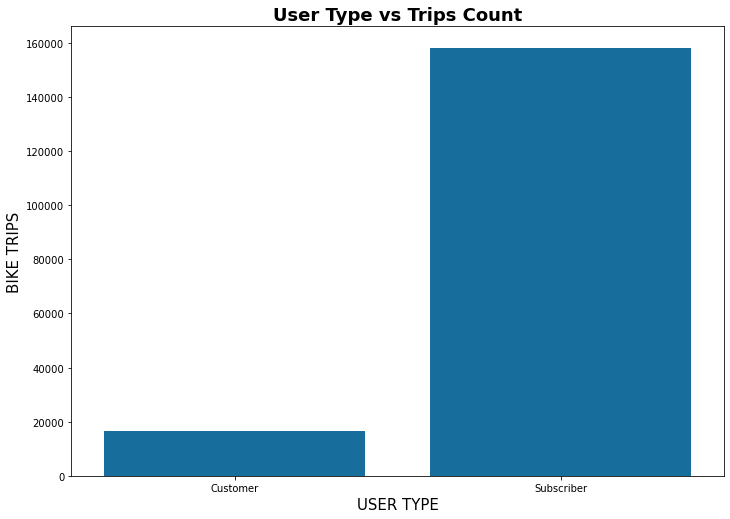

In [31]:
#Users Type Count
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
sb.countplot(data=wrangled_df, x='user_type', color=clr);
plt.xlabel('USER TYPE', fontsize=15)
plt.ylabel('BIKE TRIPS', fontsize=15)
plt.title('User Type vs Trips Count', fontsize=18, fontweight='bold');

Subscribers are using the service way much more than casual riders

Bivariate Exploration

relation between trip duration and member age

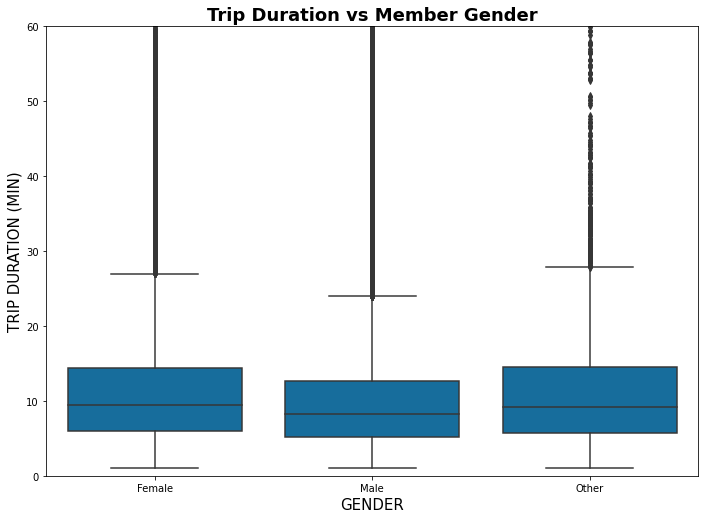

In [32]:
#drawing a box plot for relation between trip duration and member age
plt.figure(figsize=[ 11.69, 8.27]);
clr = sb.color_palette('colorblind')[0]
sb.boxplot(data=wrangled_df, x='member_gender', y='trip_duration', color=clr);
plt.xlabel('GENDER',  fontsize=15);
plt.ylabel('TRIP DURATION (MIN)', fontsize=15);
plt.title('Trip Duration vs Member Gender',  fontsize=18, fontweight='bold')
plt.ylim([0, 60]);

Seems like females are having a longer duration trips in comparison with males and other genders, that was noticed by the higher median and longer IQR for females

Member Age vs Trip Duration

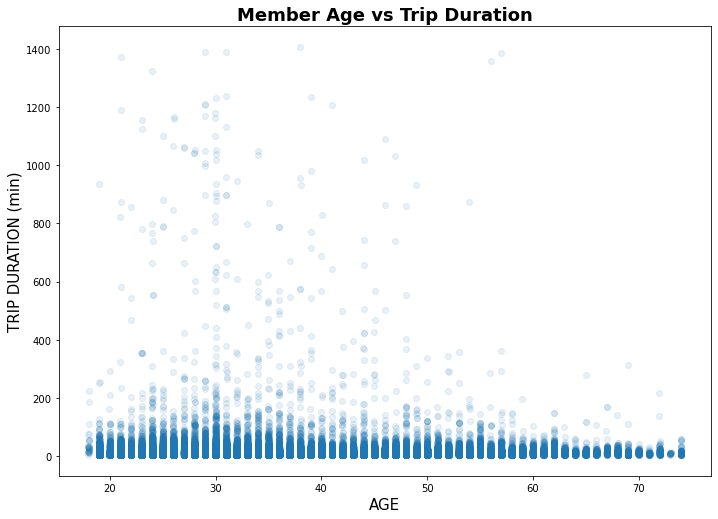

In [33]:
#Scatter Plot between the Member age and Trip duration 
plt.figure(figsize=[ 11.69, 8.27]);
sb.regplot(data = wrangled_df, x = 'member_age', y = 'trip_duration', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('AGE', fontsize=15)
plt.ylabel('TRIP DURATION (min)', fontsize=15);
plt.title('Member Age vs Trip Duration',  fontsize=18, fontweight='bold');

As we see the relation between the member age and trip duration is negatively correlated as when age increases the trip distance decreases

relation between user type and start day of week

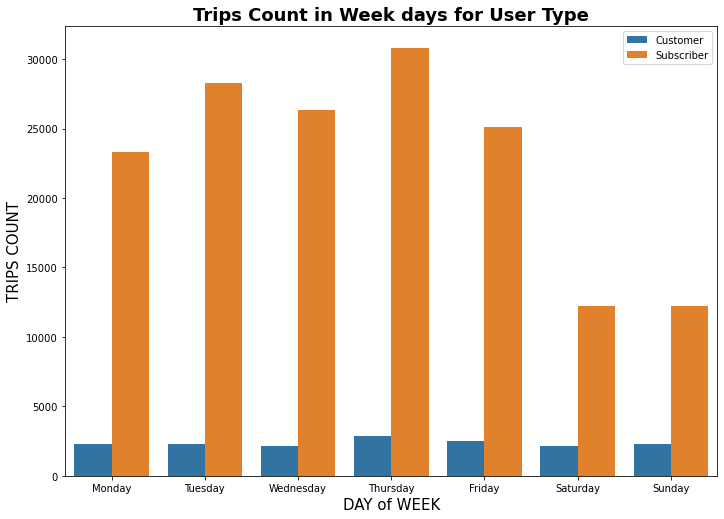

In [34]:
#clustered bar chart for relation between user type and start day of week
plt.figure(figsize=[ 11.69, 8.27]);
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=wrangled_df, x='start_dayofweek', hue='user_type', order = days_order);
plt.xlabel('DAY of WEEK',  fontsize = 15);
plt.ylabel('TRIPS COUNT',  fontsize = 15);
plt.legend(['Customer', 'Subscriber'])
plt.title('Trips Count in Week days for User Type',  fontsize=18, fontweight='bold');

Bike usage between Customers and Subscriber during week is huge, while we notice an increment in customers bike usage during weekends than weekdays which indicates that they use the bikes for wandering around the city or for fun while subscriber tend to use it during weekdays more

 relation between trip duration and user type

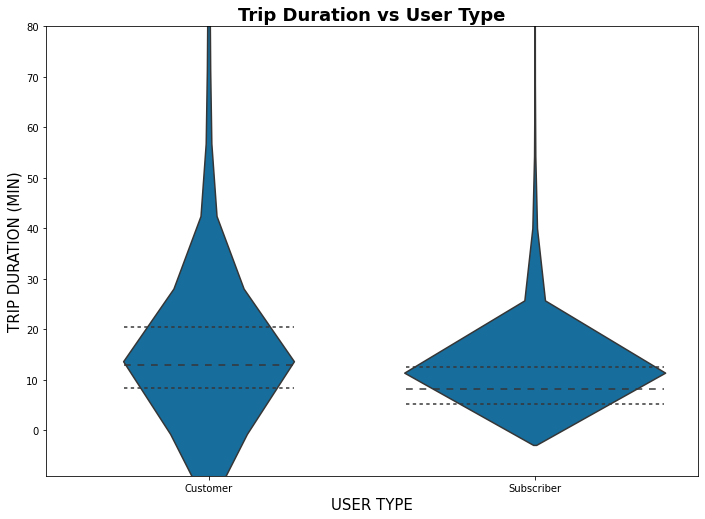

In [35]:
#drawing a violin plot for relation between trip duration and user type
plt.figure(figsize=[ 11.69, 8.27]);
sb.violinplot(data=wrangled_df, x='user_type', y='trip_duration', color=clr, inner = 'quartile');
plt.xlabel('USER TYPE',  fontsize=15);
plt.ylabel('TRIP DURATION (MIN)',  fontsize=15);
plt.title('Trip Duration vs User Type',  fontsize=18, fontweight='bold')
plt.ylim([-9, 80]);

Trip duration plot for subscribers is so flat around 10 minutes trips which might indicate that most of the subscribers take the bike for a specific errand while it's narrower for Customers which indicates that they rent the bike for longer durations

Multivariate Exploration

variation of trip duration during week between different member genders

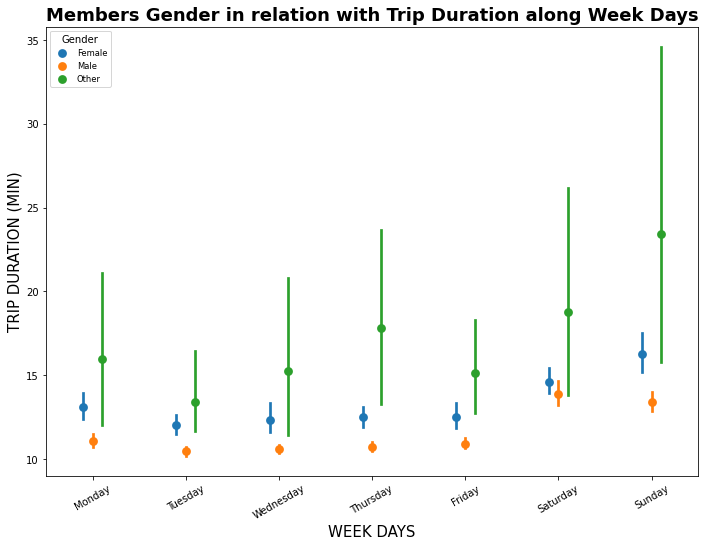

In [36]:
#point plot for variation of trip duration during week between different member genders
plt.figure(figsize=[ 11.69, 8.27]);
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.pointplot(data=wrangled_df, x='start_dayofweek', y='trip_duration', hue='member_gender', dodge = 0.2, linestyles="",order = days_order);
plt.xlabel('WEEK DAYS',  fontsize=15);
plt.legend(title="Gender", fontsize='small')
plt.xticks(rotation = 30)
plt.ylabel('TRIP DURATION (MIN)',  fontsize=15);
plt.title('Members Gender in relation with Trip Duration along Week Days',  fontsize=18, fontweight='bold');

As we can see, males usually having shorter trips duration than females and ther gender all weekdays, while other genders having the longer trips duration on Tuesday and Wednesday and for the remaining days there is female domination related to trip duration along week

relation between user type and trips count during day hours

<Figure size 841.68x595.44 with 0 Axes>

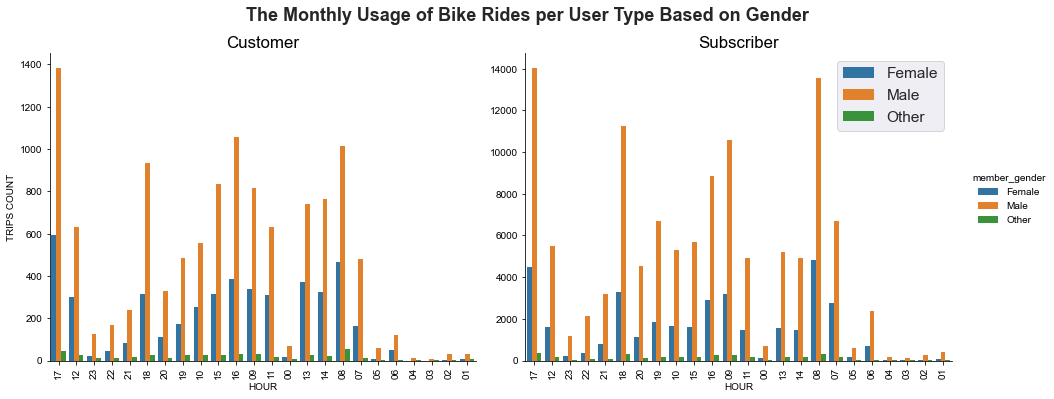

In [37]:
#Count plot for relation between user type and trips count during day hours
plt.figure(figsize=[ 11.69, 8.27]);
g = sb.catplot(data=wrangled_df, x='start_hourofday', col="user_type", hue='member_gender', kind='count', aspect=20/15,
                 sharey=False)
sb.set(font_scale = 1.4)
plt.legend(['Female', 'Male', 'Other'])
g.set_axis_labels('HOUR', 'TRIPS COUNT')
g.set_xticklabels(rotation=90)
g.set_titles('{col_name}')
g.fig.suptitle('The Monthly Usage of Bike Rides per User Type Based on Gender', fontsize=18, fontweight='bold', y =1.06);

In the chart we can see that males do the most number of trips almost every hour o the day followed by females then other genders

What did you find in this analysis that you find intresting?

 i'm interested in knowing why females usually having longer trip duration than males, i think bec they are too carfull 

In [ ]:
!jupyter nbconvert sslide_disk.ipynb --to slides --post serve --no-input --no-prompt